In [1]:
!pwd

/home/diego/Lab/Chaos


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import math 
from scipy.optimize import curve_fit
from scipy.special import wofz

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
cmap = plt.get_cmap('Set3')
cmap2 = plt.get_cmap('Set1')
cmap3 = plt.get_cmap('Dark2')
cmap4 = plt.get_cmap('tab20b')
cmap5 = plt.get_cmap('Set2')
cmap6 = plt.get_cmap('tab10')
cmap7 = plt.get_cmap('tab20')

In [3]:
# parameters for figure size
w = 7
h = 6
save = True 

In [33]:
#importing data 
test=pd.read_csv('./2bodyLeapFrog_1000_steps_per_Orbit.txt',
names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2", "e","E","a","j", "h"],
encoding='latin-1',
    sep=" "
)


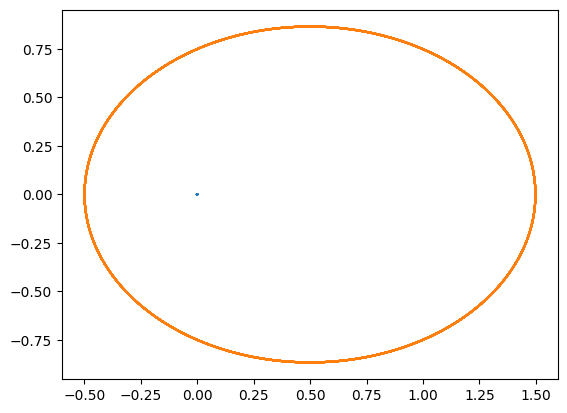

In [34]:
plt.plot(test.x1, test.y1)

plt.plot(test.x2, test.y2)


#

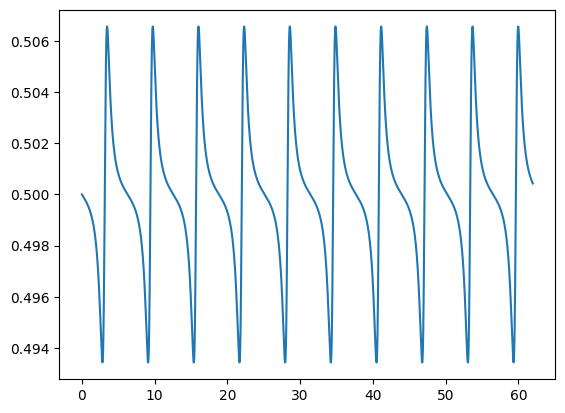

In [35]:
#plt.plot(test.t, np.log10( np.abs( (test.E-test.E[0])/test.E[0] ) )    )
plt.plot(test.t, test.e)
#plt.plot(test.t, test.E)